In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

dframe= pd.read_csv('C:/Users/Harsh/Desktop/npcl.5_id_data.csv')
id=dframe['location_id'].unique()

# dframe.columns
d_frame=dframe[['data.grid_reading_kwh','data.grid_kwh_unit','data.creation_time','data.status',
'data.meter_sr_no','data.error_reason','data.R_voltage','data.Y_volatge',
'data.B_voltage', 'data.r_current', 'data.y_current','data.b_current','site_id',
'location_id','data.cumm_pf','data.instant_cum_Kw', 'data.instant_cum_Kva','data.frequency']]
# combined_df['data.cumm_pf'].plot(figsize=(18,5))

# checks
# Status "P"
combined_df=d_frame[d_frame['data.status']== "P"]

#no consumption
combined_df.loc[combined_df['data.error_reason'] == 'No Consumption', 'data.grid_kwh_unit'] = 0

# null values
if combined_df.isnull().sum().sum()>0:
    combined_df.dropna(inplace=True)

# special character
def special_char():
    special_character_pattern = r'[!@#$%^&*()]'
    rows_with_special_chars = combined_df[combined_df['location_id'].str.contains(special_character_pattern, regex=True)]
    return ( rows_with_special_chars)
if combined_df['location_id'].dtype != 'int64':
    special_char()

#  creation time relabelling 
# combined_df['data.creation_time']=pd.to_datetime(combined_df['data.creation_time'])

# integer conversion
combined_df['data.grid_reading_kwh']=combined_df['data.grid_reading_kwh'].round()


final_lst=[]
for each_id in id:
    df=combined_df[combined_df['location_id'] == each_id ]
    df['data.creation_time']=pd.to_datetime(df['data.creation_time'])
    df.set_index(['data.creation_time'],drop=True, inplace=True)
    
    # dfresample=df[['data.grid_reading_kwh']].resample(rule='1H').max()

    # df['units']=round((df['data.grid_reading_kwh']-df['data.grid_reading_kwh'].shift(1)),2)
    # df.dropna(inplace=True)
    # df = df[df['units'] >= 0]
    df_resample=df[['data.grid_reading_kwh']].resample(rule='1H').max()
    df_resample['data.grid_reading_kwh'].interpolate(inplace=True)
    df_resample['grid_reading']=round(df_resample['data.grid_reading_kwh'])
    # df_resample['unit']=df_resample['grid_reading']-df_resample['grid_reading'].shift(1)
    # df_resample = df_resample[df_resample['unit'] >= 0]
    
    
    

    final_lst.append(df_resample)

final_df = pd.concat(final_lst)


In [2]:
df=final_lst[4]


In [4]:
df_resample.drop(['data.grid_reading_kwh'],axis=1,inplace=True)
df

,grid_reading
data.creation_time,
2021-05-01 00:00:00,463.0
2021-05-01 01:00:00,467.0
2021-05-01 02:00:00,470.0
2021-05-01 03:00:00,473.0
2021-05-01 04:00:00,477.0
...,...
2023-08-17 19:00:00,21673.0
2023-08-17 20:00:00,21674.0
2023-08-17 21:00:00,21676.0


In [ ]:
plt.rcParams["figure.figsize"] = (20,5)

In [ ]:
plt.plot(df['grid_reading'])

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [ ]:
add_resut=seasonal_decompose(df['grid_reading'],model='additive',period=24)

In [ ]:
add_resut.plot().suptitle('\n additive',fontsize=12)

In [ ]:
df=pd.concat([add_resut.seasonal,add_resut.trend,add_resut.resid,add_resut.observed],axis=1)
df.columns=["seasonal",'trend','resid','actual_value']
df

In [ ]:
result=adfuller(df['actual_value'],autolag='AIC')

In [ ]:
result

In [ ]:
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

In [5]:
df

,grid_reading
data.creation_time,
2021-05-01 00:00:00,463.0
2021-05-01 01:00:00,467.0
2021-05-01 02:00:00,470.0
2021-05-01 03:00:00,473.0
2021-05-01 04:00:00,477.0
...,...
2023-08-17 19:00:00,21673.0
2023-08-17 20:00:00,21674.0
2023-08-17 21:00:00,21676.0


In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have a time series data called 'time_series_data'
# Replace this with your actual time series data

# Calculate ACF and PACF
acf = sm.tsa.acf(df['grid_reading'], nlags=40)  # Adjust the number of lags as needed
pacf = sm.tsa.pacf(df['grid_reading'], nlags=40)  # Adjust the number of lags as needed

# Create ACF and PACF plots
plt.figure(figsize=(12, 6))

# # ACF plot
# plt.subplot(1, 2, 1)
# plt.plot(range(len(acf), acf))
# plt.title('Autocorrelation Function (ACF)')

# # PACF plot
# plt.subplot(1, 2, 2)
# plt.plot(range(len(pacf), pacf))
# plt.title('Partial Autocorrelation Function (PACF')

# plt.show()



AttributeError: 'numpy.ndarray' object has no attribute 'plot'

<Figure size 1200x600 with 0 Axes>

In [10]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

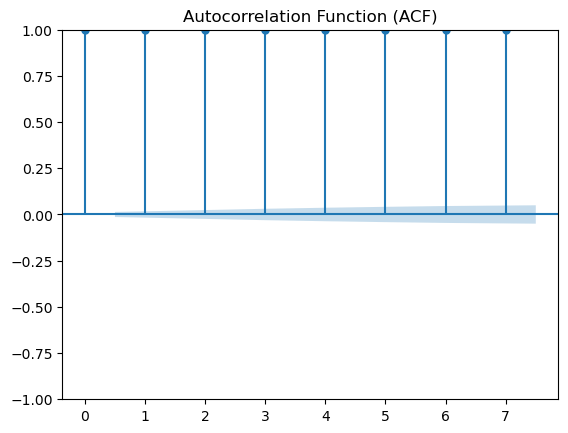

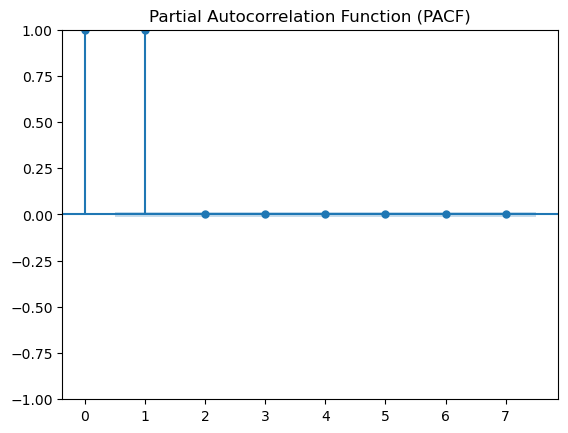

In [13]:
plot_acf(df['grid_reading'], lags=7)
plt.title("Autocorrelation Function (ACF)")
plt.show()

# Plot the PACF
plot_pacf(df['grid_reading'], lags=7)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()